# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости


# Исследование объявлений о продаже квартир

***Описание данных***
На основе данных сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет выполнить цель проекта (определить рыночную стоимость). По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. 

***Задачи и цели проекта:***
- Определить рыночную стоимость объектов недвижимости
- Установить параметры, влияющие на цену объектов

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#подключение нужных библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


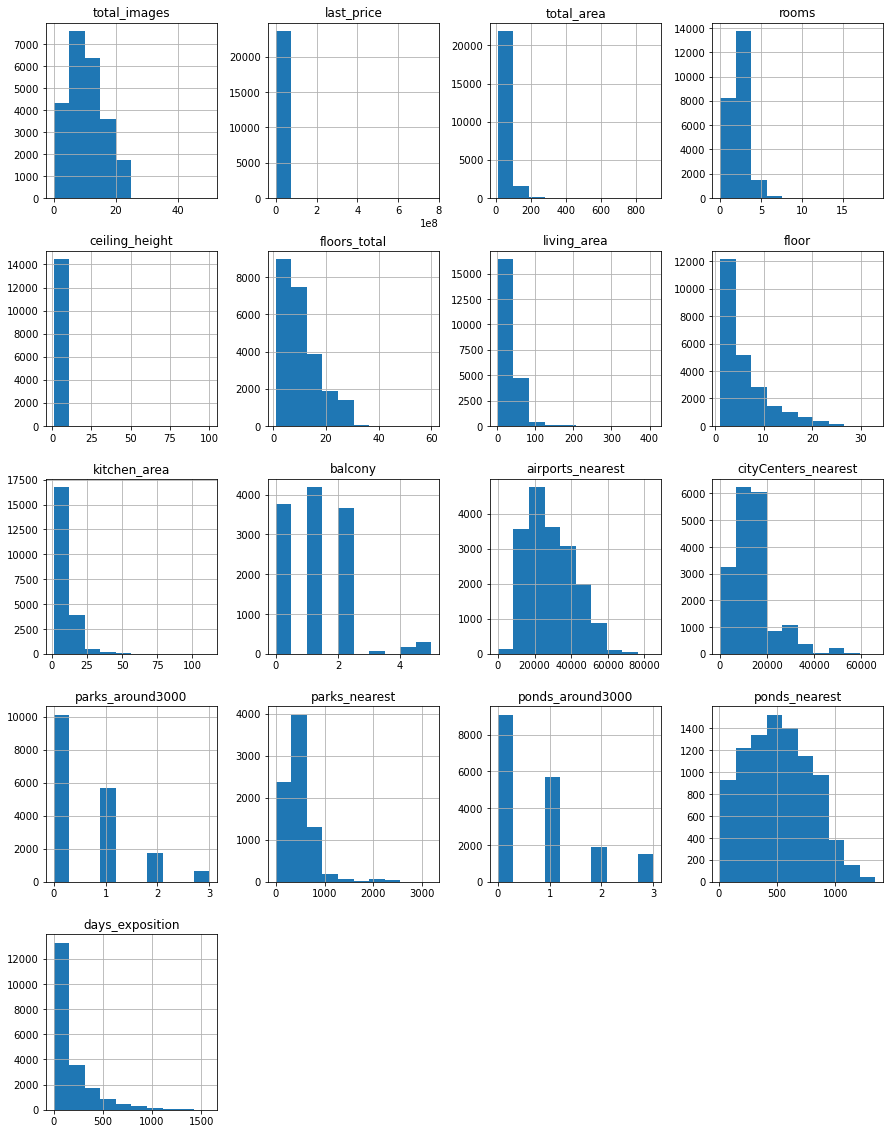

In [3]:
data.hist(figsize = (15,20));

По графику видно, что у некоторых столбцов возможны проблемы с данными, т.е. у столбцов: ceiling_height (Высота потолков), last_price (цена объекта), cityCenters_nearest (расстояние до центра города), parks_around3000 (расстояние до парка около 3000 м), ponds_around3000 (расстояние до водоема около 3000м).

### Предобработка данных

In [4]:
#общая информация 
data.info() 
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

(23699, 22)

In [5]:
#количество пропусков
data.isnull().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Достаточно много пропусков в данных. 

Пропуски есть в столбцах: 
- ceiling_height,
- floors_total ,
- living_area, 
- is_apartment,
- kitchen_area,
- balcony, 
- airports_nearest,
- cityCenters_nearest,
- parks_around3000,
- parks_nearest,
- ponds_around3000,
- ponds_nearest ,
- days_exposition. 

Столбцы "ceiling_height" и "floors_total" - неизвестно сейчас, как заполнить пропуски. В столбце "living_area" - по среднему значению.

***Столбец floors_total***

В этом столбце пропуски нельзя заполнить ни медианным, ни средним значением, так как количество этажей во всем доме либо есть, либо его нет. Поэтому удалим те строки, в которых есть пропуски в этом столбце.

In [6]:
#удаляем значения NaN
data = data.dropna(subset = ['floors_total'])

In [7]:
#проверка, что удалились все пропуски
data['floors_total'].isnull().sum()

0

***Столбец is_apartment.*** 

Пропуски обусловлены тем, что когда человек  отвечал на вопрос: "Это апартаменты?", пропуском он подразумевал False


In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isnull().sum() #проверка, что заменили все пропуски

0

***Столбец living_area***

Жилая площадь не может быть меньше 6.00 по гос.стандарту. 

In [9]:
# находим срез удовлятворяющей  условию гос.стандарта (минимальная жилая плошадь 6.00)
data = data.query('living_area > 6') 
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,False,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,False,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,False,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data['living_area'].sort_values() #проверка, что убрались значения, неудовлетворяющие нашему условию

19251      6.5
20994      8.0
23208      8.0
114        8.3
2309       8.4
         ...  
12859    322.3
4237     332.0
12401    347.5
5358     409.0
19540    409.7
Name: living_area, Length: 21736, dtype: float64

***Столбец kitchen_area***

Площадь кухни не может быть меньше 4.50 метров по гос.стандарту

In [11]:
data = data.query('kitchen_area >4.50') # находим срез удовлятворяющий условию гос.стандарта

In [12]:
data['kitchen_area'].sort_values() # проверяем что нет значений, которые меньшe 4.5

18231      4.6
11217      4.6
17138      4.6
21020      4.6
7436       4.7
         ...  
16239     93.2
5358     100.0
2489     100.7
20215    107.0
19540    112.0
Name: kitchen_area, Length: 20868, dtype: float64

***Столбец balcony*** 

Если в данном столбце пропуск, то балкона нет. Пропуски нужно заполнить нулем.

In [13]:
data['balcony'] = data['balcony'].fillna(0)

In [14]:
data['balcony'].head()

0    0.0
1    2.0
2    0.0
4    0.0
5    0.0
Name: balcony, dtype: float64

***Столбец locality_name***

Сначала удалим пропуски, где не написано название поселка.

In [15]:
data = data.dropna(subset = ['locality_name'])
data['locality_name'].isnull().sum() #проверка, что удалили пустые значения

0

In [16]:
data['locality_name'].unique() #посмотрим все варианты уникальных значений

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

In [17]:
#функция распределяющая все названия на поселки, села, деревни, пгт, садовые товарищества и прочие(тут города и модет названия поселков где не указано типа)
def type_locality_name(locality):
    if 'посёлок' in locality:
        return 'поселок'
    if 'поселок' in locality:
        return 'поселок'
    if 'поселок при железнодорожной станции' in locality or 'посёлок при железнодорожной станции' in locality:
        return 'поселок'
    if 'деревня' in locality:
        return 'деревня'
    if 'село' in locality:
        return 'село'
    if 'посёлок городского типа'  in locality or 'поселок городского типа' in locality:
        return 'пгт'
    if 'городской посёлок' in locality or 'городской поселок' in locality:
        return 'пгт'
    if 'садовое товарищество' in locality or 'садовое некоммерческое товарищество' in locality:
        return 'садовое товарищество'
    else:
        return 'прочие'

In [18]:
data['locality_type'] = data['locality_name'].apply(type_locality_name)

In [19]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,прочие
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,прочие
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,прочие
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,поселок


In [20]:
# Поменяем в столбце с названиями типы поселков и е на ё сначала
# Нам нужно убрать название поселка, города и т.д. 
data['locality_name'] = data['locality_name'].replace('|'.join(['посёлок ', 'поселок ','городского ','типа ','деревня ']), '', regex=True)

In [21]:
data['locality_name'].value_counts()

Санкт-Петербург                     13990
Мурино                                455
Шушары                                391
Кудрово                               376
Всеволожск                            357
                                    ...  
садовое товарищество Новая Ропша        1
Сижно                                   1
Котлы                                   1
Старополье                              1
Дзержинского                            1
Name: locality_name, Length: 302, dtype: int64

#### Пропуски в картографических данных заполним "-1", что будет означать что здесь пропуск.

***Столбец airports_nearest***

In [22]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1)

***Столбец cityCenters_nearest***

In [23]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)

***Столбец parks_around3000***

In [24]:
data['parks_around3000'] = data['parks_around3000'].fillna(-1)

***Столбец parks_nearest***

In [25]:
data['parks_nearest'] = data['parks_nearest'].fillna(-1)

***Столбец ponds_around3000***

In [26]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(-1)

***Столбец ponds_nearest***

In [27]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)

Аналогичным образом заполним столбец "days_exposition", т.е. сколько дней было размещено объявление (от публикации до снятия), "-1", что означает, что квартира еще не продана.

***Столбец days_exposition***

In [28]:
data['days_exposition'] = data['days_exposition'].fillna(-1)

***Типы данных***
Поменяем типы данных:
- Столбец "first_day_exposition" с типа ***строки*** в тип ***даты***. 
- Столбец "floors_total" с ***вещественного типы данных*** в ***целый***. 
- Столбец "balcony" с ***вещественного типы данных*** в ***целый***.

In [29]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20830 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20830 non-null  int64         
 1   last_price            20830 non-null  float64       
 2   total_area            20830 non-null  float64       
 3   first_day_exposition  20830 non-null  datetime64[ns]
 4   rooms                 20830 non-null  int64         
 5   ceiling_height        13272 non-null  float64       
 6   floors_total          20830 non-null  int64         
 7   living_area           20830 non-null  float64       
 8   floor                 20830 non-null  int64         
 9   is_apartment          20830 non-null  bool          
 10  studio                20830 non-null  bool          
 11  open_plan             20830 non-null  bool          
 12  kitchen_area          20830 non-null  float64       
 13  balcony         

#### Обработка аномальных значений

***Столбец Ceiling_height***

Аномальными считается высота потолков больше 10м. Наверное была допущена опечатка, поэтому с помощью цикла монжо уберать эти значения делением на 10.

In [31]:
for i in data['ceiling_height']:
        if i > 10 and i in data['ceiling_height']:
            i = i // 10
data['ceiling_height'].sort_values(ascending=False)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
21824     27.0
         ...  
23676      NaN
23687      NaN
23690      NaN
23692      NaN
23695      NaN
Name: ceiling_height, Length: 20830, dtype: float64

In [32]:
#Замена пустых значений на медианное значение высоты потолка
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#проверка остались ли пустые значения
data['ceiling_height'].isnull().sum() 

0

***Стобец Total_area***

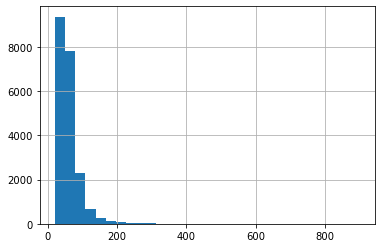

In [33]:

data['total_area'].hist(bins=30);

Считаем аномальными квартиры, которые больше 250 кв.м

In [34]:
data = data.query('total_area <= 250')
data['total_area'].sort_values(ascending=False) #проверка, что нет значений больше 250

13845    250.00
23491    250.00
20791    250.00
13931    250.00
13019    249.90
          ...  
114       21.40
2461      21.10
7755      20.67
4077      20.00
8873      20.00
Name: total_area, Length: 20742, dtype: float64

***Столбец Ceiling_height***

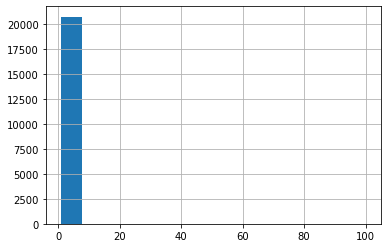

In [35]:
data['ceiling_height'].hist(bins=15);


Считаем аномальными квартиры, у которых потолок выше 6м

In [36]:
data = data.query('ceiling_height <= 6')
data['total_area'].sort_values(ascending=False) #проверка, что нет значений больше 6

23491    250.00
13845    250.00
20791    250.00
13931    250.00
13019    249.90
          ...  
114       21.40
2461      21.10
7755      20.67
8873      20.00
4077      20.00
Name: total_area, Length: 20719, dtype: float64

***Столбец Rooms***

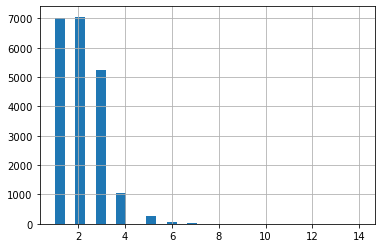

In [37]:
data['rooms'].hist(bins=30);

Аномальными значениями можно считать квартиры, где комнат больше 7.

In [38]:
data = data.query('rooms <= 7')
data['rooms'].sort_values(ascending=False) #проверка, что нет значений больше 7

1813     7
13525    7
22649    7
22264    7
4159     7
        ..
3257     1
14063    1
14066    1
14068    1
23698    1
Name: rooms, Length: 20707, dtype: int64

### Вывод
Предработка данных завершена. Из исходной таблицы удалила 2831 строку, так как эти строки не подходили по описанию данных и по заданным параметрам. Также обработала все неявные дубликаты и заполнила пропуски, соответсвующими значениями. 

### Добавьте в таблицу новые столбцы со следующими параметрами

Добавление столбца 'metres_price'(цена одного квадратного метра): 

Цена 1 м кв= last_price/total_area

In [39]:
data['metres_price'] = data['last_price'] / data['total_area']

In [40]:
data['metres_price'].head()

0    120370.370370
1     82920.792079
2     92785.714286
4    100000.000000
5     95065.789474
Name: metres_price, dtype: float64

Добавление столбца "day_of_week": 

день недели публикации объявления (0 — понедельник, 1 — вторник и так далее). 

In [41]:
def day_of_week(days):
    if days.dayofweek == 0:
        return "понедельник" 
    elif days.dayofweek == 1:
        return "вторник"
    elif days.dayofweek == 2:
        return "среда"
    elif days.dayofweek == 3:
        return "четверг"
    elif days.dayofweek == 4:
        return "пятница"
    elif days.dayofweek == 5:
        return "суббота"
    elif days.dayofweek == 6:
        return "воскресенье"
data['day_of_week'] = data['first_day_exposition'].apply(day_of_week)

In [42]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type,metres_price,day_of_week
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,прочие,120370.370370,четверг
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,поселок,82920.792079,вторник
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,прочие,92785.714286,четверг
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,прочие,100000.000000,вторник
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской Янино-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,55.0,поселок,95065.789474,понедельник


Добавление столбца "name_month": 

месяц публикации объявления, по аналогии с днем недели

In [43]:
def name_month(months):
    if months.month == 1:
        return "январь" 
    elif months.month == 2:
        return "февраль" 
    elif months.month == 3:
        return "март"
    elif months.month == 4:
        return "апрель"
    elif months.month == 5:
        return "май"
    elif months.month == 6:
        return "июнь"
    elif months.month == 7:
        return "июль"
    elif months.month == 8:
        return "август"
    elif months.month == 9:
        return "сентябрь"
    elif months.month == 10:
        return "октябрь"
    elif months.month == 11:
        return "ноябрь"
    elif months.month == 12:
        return "декабрь"
data['months_name'] = data['first_day_exposition'].apply(name_month)

Добавление столбца "years": 

год публикации объявления

In [44]:
data['years'] = data['first_day_exposition'].dt.year

In [45]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type,metres_price,day_of_week,months_name,years
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,прочие,120370.370370,четверг,март,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,поселок,82920.792079,вторник,декабрь,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,прочие,92785.714286,четверг,август,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,прочие,100000.000000,вторник,июнь,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.10,0,городской Янино-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,55.0,поселок,95065.789474,понедельник,сентябрь,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.5,4,False,False,False,6.00,0,Тихвин,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,413.0,прочие,45000.000000,пятница,июль,2017
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,False,False,8.00,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,прочие,73717.948718,пятница,август,2016
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,-1.0,прочие,72490.845228,вторник,март,2017
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,False,False,8.50,0,Тосно,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,45.0,прочие,52542.372881,понедельник,январь,2018


Добавление столбца "floors_total": 

тип этажа квартиры (значения — «первый», «последний», «другой»). С помощью функции

In [46]:
data['floors_total'].sort_values(ascending=False) 

2253     60
16731    52
16934    37
397      36
11079    36
         ..
9752      1
17744     1
11641     1
5300      1
17020     1
Name: floors_total, Length: 20707, dtype: int64

По данным видно, что максимальный этаж - 60-ый.

In [47]:
data['floor'].unique()

array([ 8,  1,  4, 13,  5,  6, 26,  7,  3,  2, 11, 15,  9, 18, 22, 10, 19,
       20, 27, 25, 17, 14, 12, 21, 28, 24, 16, 23, 30, 29, 32, 33, 31])

In [48]:
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4, 24,
        8,  2, 10,  7, 15, 22, 13, 20, 28, 36, 21, 35, 60,  1, 29, 33, 52,
       37])

In [49]:
def type_of_floor(floor, total):
    if floor == 1:
        return "первый"
    elif floor == total:
        return "последний"
    else:
        return "другой"

In [50]:
data['type_of_floor'] = data.apply(lambda x: type_of_floor(x['floor'], x['floors_total']), axis=1)

Добавление столбца "cityCenters_nearest_km": 

расстояние до центра города в километрах

In [51]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

In [52]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type,metres_price,day_of_week,months_name,years,type_of_floor,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,прочие,120370.370370,четверг,март,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,поселок,82920.792079,вторник,декабрь,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,прочие,92785.714286,четверг,август,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,прочие,100000.000000,вторник,июнь,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской Янино-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,55.0,поселок,95065.789474,понедельник,сентябрь,2018,другой,-0.0


### Исследовательский анализ данных

Найдем взаимосвязьс каждым из данных параметров.

Для этого сначала рассмотрим каждый параметр по отдельности. А потом уже из зависимости

***Общая площадь объекта***

In [53]:
data['total_area'].describe()

count    20707.000000
mean        59.320977
std         28.302637
min         20.000000
25%         40.500000
50%         52.000000
75%         69.600000
max        250.000000
Name: total_area, dtype: float64

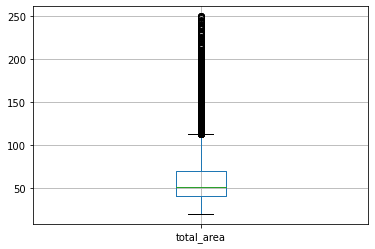

In [54]:
data.boxplot('total_area');

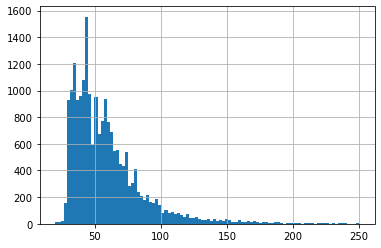

In [55]:
data['total_area'].hist(bins=100); 

По графикам видно, что большее количество квартир имееют площадь равную примерно медианному значению, т.е. около 59м. 

***Жилая площадь***

In [56]:
data['living_area'].describe()

count    20707.000000
mean        33.929814
std         18.647260
min          6.500000
25%         18.800000
50%         30.000000
75%         42.300000
max        184.000000
Name: living_area, dtype: float64

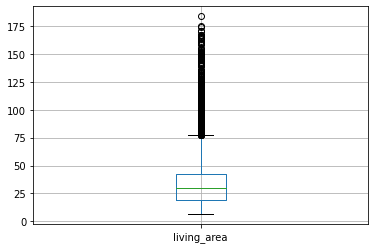

In [57]:
data.boxplot('living_area');

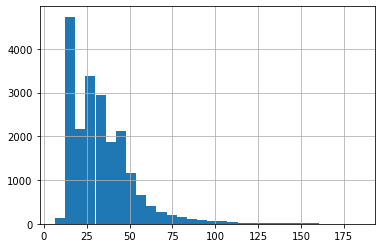

In [58]:
data['living_area'].hist(bins=30);

Большинство квартир имеют медианное значение жилой площади.

***Площадь кухни***

In [59]:
data['kitchen_area'].describe()

count    20707.000000
mean        10.430043
std          5.505994
min          4.600000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

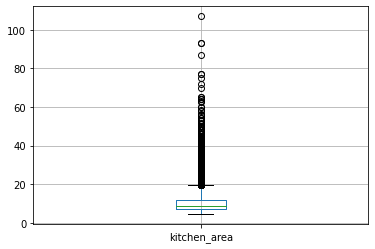

In [60]:
data.boxplot('kitchen_area');

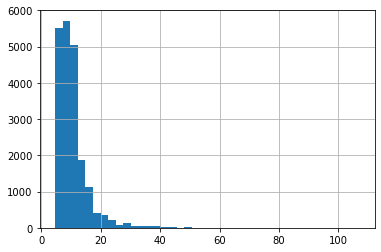

In [61]:
data['kitchen_area'].hist(bins=40);

В основном все квартиры имеют среднюю площадь кухни, но есть и те, которые выбиваются, но их значительно меньше

***Цена объекта***

In [62]:
data['last_price'] = data['last_price'] / 1000000

In [63]:
data['last_price'].describe()

count    20707.000000
mean         6.219294
std          7.039070
min          0.012190
25%          3.500000
50%          4.690000
75%          6.750000
max        330.000000
Name: last_price, dtype: float64

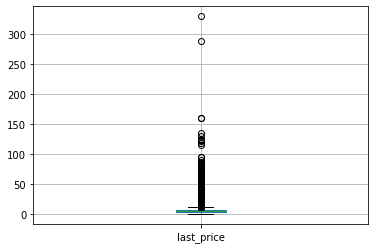

In [64]:
data.boxplot('last_price');

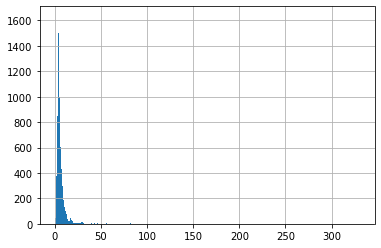

In [65]:
data['last_price'].hist(bins=1000);

По графику видно, что цены на квартиры абсолютно разные, но чаще встречаемая цена это около 5 млн. Чем выше цена, тем меньше представленных объектов

***Количество комнат***

In [66]:
data['rooms'].describe()

count    20707.000000
mean         2.074516
std          0.998309
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

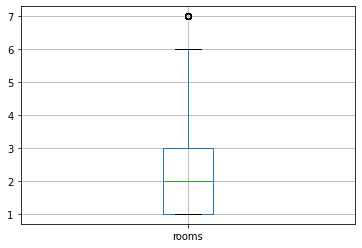

In [67]:
data.boxplot('rooms');

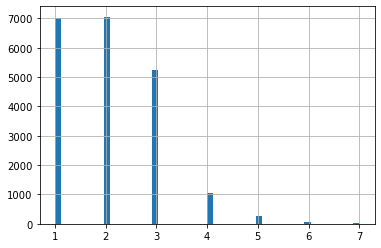

In [68]:
data['rooms'].hist(bins=50);

В представленных данных большое количество однокомнатных и двухкомнатных квартир, и этих квартир почти одинаковое количество. Дальше идут трехкомнатные квартиры. И соответсвенно, чем больше комнат, тем меньше представленных квартир.

***Высота потолков***

In [69]:
data['ceiling_height'].describe()

count    20707.000000
mean         2.694848
std          0.217569
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

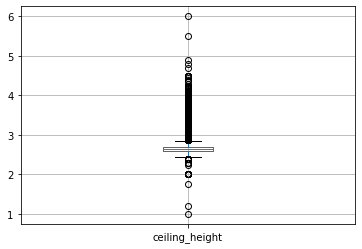

In [70]:
data.boxplot('ceiling_height');

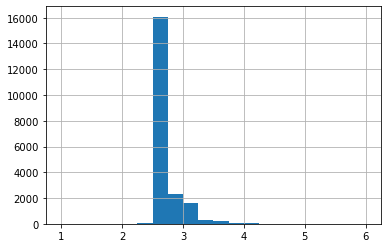

In [71]:
data['ceiling_height'].hist(bins=20);

По графику видно, что  основном в квартирах высота потолка где-то 3 м. Все, что выше 7 м, считаются выбросами.

***Этаж***

In [72]:
data['floor'].describe()

count    20707.000000
mean         5.843918
std          4.814875
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

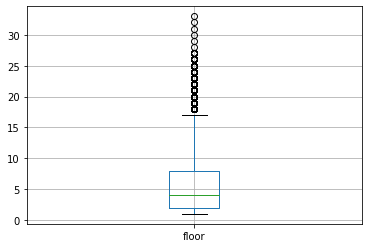

In [73]:
data.boxplot('floor');

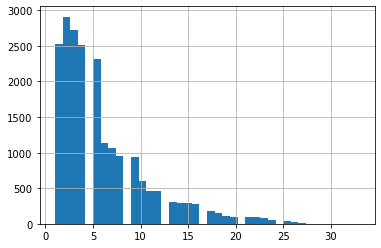

In [74]:
data['floor'].hist(bins=40);

Большинство квартир находится на 2-3 этаже. Чем выше этаж, тем меньше представленных квартир.

***Тип этажа квартиры («первый», «последний», «другой»)***

In [75]:
data['type_of_floor'].describe()

count      20707
unique         3
top       другой
freq       15250
Name: type_of_floor, dtype: object

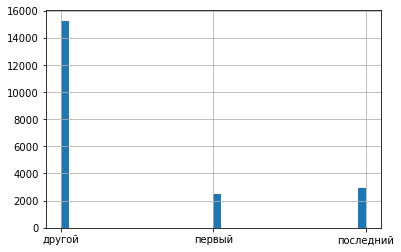

In [76]:
data['type_of_floor'].hist(bins=40);

Большое количество квартир находятся на средних этажах.

***Общее количество этажей в доме***

In [77]:
data['floors_total'].describe()

count    20707.000000
mean        10.588448
std          6.515993
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

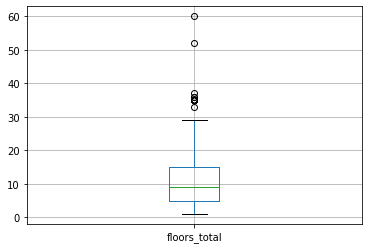

In [78]:
data.boxplot('floors_total');

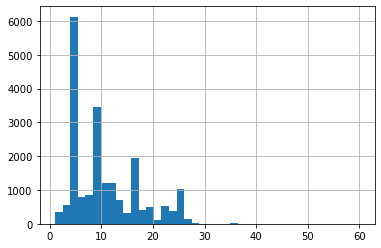

In [79]:
data['floors_total'].hist(bins=40);

Много квартир есть в пятиэтажных домах, а потом в девятиэтажных домах. 

***Расстояние до центра города в метрах***

In [80]:
data['cityCenters_nearest'].describe()

count    20707.000000
mean     11104.687159
std       9673.987850
min         -1.000000
25%       3022.500000
50%      11477.000000
75%      15336.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

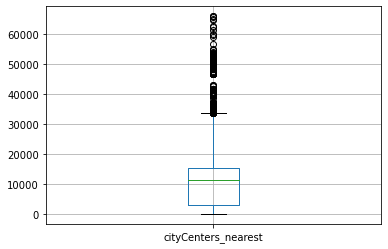

In [81]:
data.boxplot('cityCenters_nearest');

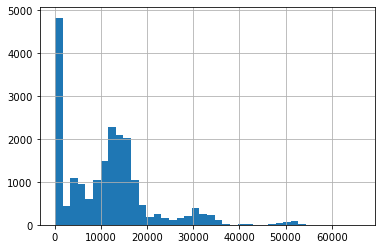

In [82]:
data['cityCenters_nearest'].hist(bins=40);

Большинство квартир находится в центре, также есть квартиры, которые находятся в 10-20 км от центра.

***Расстояние до ближайшего аэропорта***

In [83]:
data['airports_nearest'].describe()

count    20707.000000
mean     22364.390786
std      16395.809867
min         -1.000000
25%      10876.000000
50%      22017.000000
75%      34605.000000
max      84869.000000
Name: airports_nearest, dtype: float64

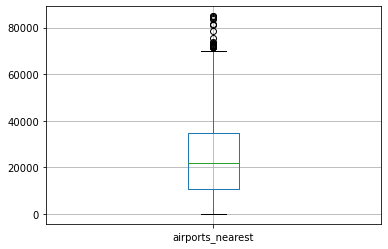

In [84]:
data.boxplot('airports_nearest');

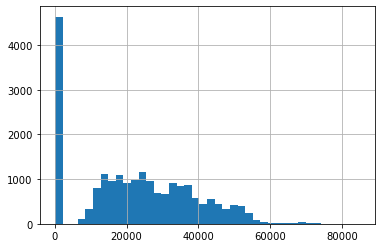

In [85]:
data['airports_nearest'].hist(bins=40);

Пропуски обозначали 0. Среднее расстояние до аэропорта от всех квартир где-то 20 км.

***Расстояние до ближайшего парка***

In [86]:
data['parks_nearest'].describe()

count    20707.000000
mean       168.078186
std        306.233406
min         -1.000000
25%         -1.000000
50%         -1.000000
75%        307.500000
max       3190.000000
Name: parks_nearest, dtype: float64

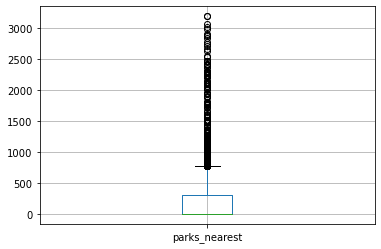

In [87]:
data.boxplot('parks_nearest');

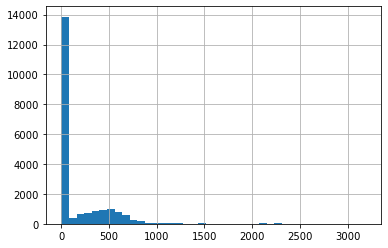

In [88]:
data['parks_nearest'].hist(bins=40);

В среднем квартиры расположены в 500 м от парка. Пропуски заполнили 0

***День публикации объявления***

In [89]:
data['day_of_week'].describe()

count       20707
unique          7
top       четверг
freq         3772
Name: day_of_week, dtype: object

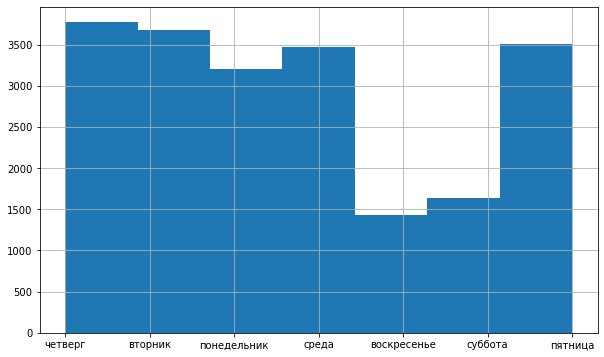

In [90]:
data['day_of_week'].hist(bins=7, figsize=(10,6));

По графику видно, что в четверг выставляли самое большое количество квартир. А в воскресенье самое меньшее количество. Получается, что в выходные меньше выставляют на продажу, чем в простые рабочие дни.

***Месяц публикации объявления***

In [91]:
data['months_name'].describe()

count       20707
unique         12
top       февраль
freq         2282
Name: months_name, dtype: object

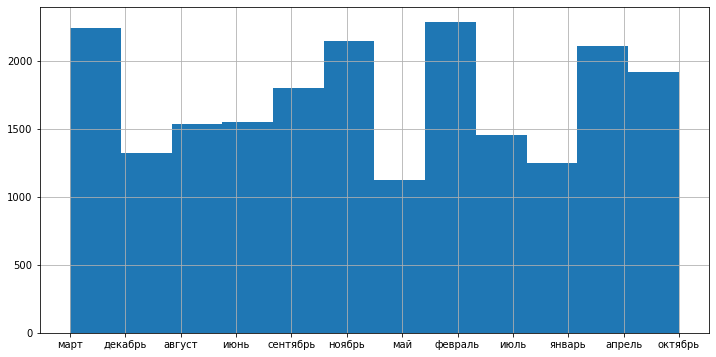

In [92]:
data['months_name'].hist(bins=12, figsize=(12,6));


В марте было выставлено больше всего объявлений. А в декабре, январе и мае наименьшее количество.

***Продажи квартир***

Теперь изучим, как быстро продавались квартиры

In [93]:
data[data['days_exposition'] == -1]['days_exposition'].count() 

2853

In [94]:
data[data['days_exposition'] != -1]['days_exposition'].mean()

185.1696538590792

In [95]:
data[data['days_exposition'] != -1]['days_exposition'].median()

102.0

In [96]:
data[data['days_exposition'] != -1]['days_exposition'].max()

1580.0

In [97]:
data[data['days_exposition'] != -1]['days_exposition'].min()

1.0

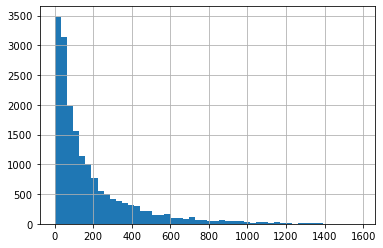

In [127]:
data[data['days_exposition'] != -1]['days_exposition'].hist(bins=50);

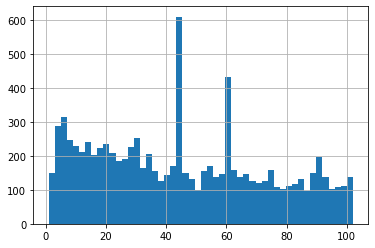

In [128]:
data[data['days_exposition'] != -1]['days_exposition'].hist(bins=50, range=(1, 102));

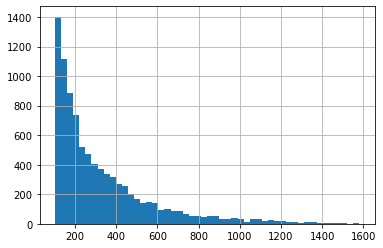

In [129]:
data[data['days_exposition'] != -1]['days_exposition'].hist(bins=50, range=(102, 1580));

По графику видно,что в среднем объявление находится на сайте около 110-150 дней. До медианного значения есть два пика, это 45-50 дней и 60 дней. Самыми быстрыми объявлениями можно считать до 20 дней, самыми долгими после 1200 дней, так как их очень мало.

***Зависимости цены от данных параметров***

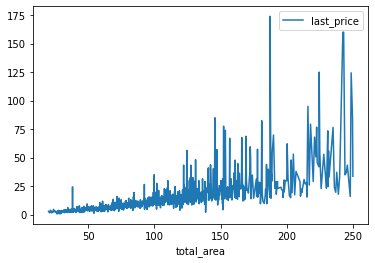

In [130]:
data.pivot_table(index = 'total_area', values='last_price').plot();

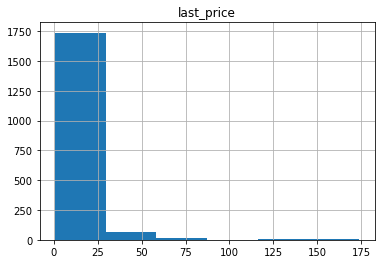

In [131]:
data.pivot_table(index = 'total_area', values='last_price').hist(bins=6);

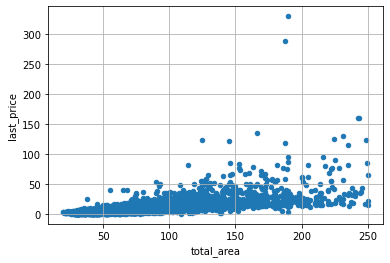

In [132]:
data.plot(x = 'total_area', y='last_price', kind='scatter', grid=True);

По графикам видно следующую зависимость: Чем больше площадь, тем больше цена.

***Жилая площадь от цены***

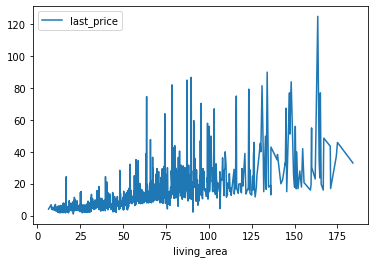

In [133]:
data.pivot_table(index = 'living_area', values='last_price').plot();

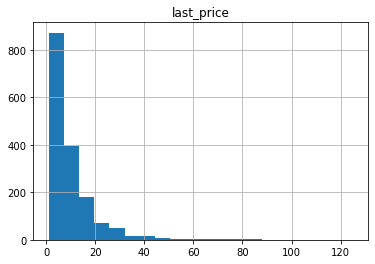

In [134]:
data.pivot_table(index = 'living_area', values='last_price').hist(bins=20);

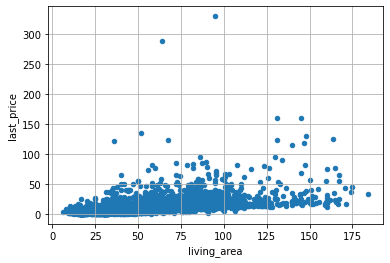

In [135]:
data.plot(x = 'living_area', y='last_price', kind='scatter', grid=True);

На графиках видно, что нет прямой зависимоси жилой площади от цены

***Площадь кухни и цена***

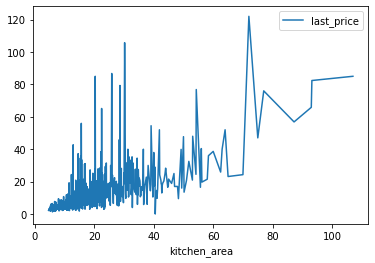

In [136]:
data.pivot_table(index = 'kitchen_area', values='last_price').plot();

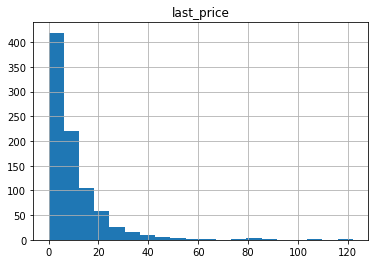

In [137]:
data.pivot_table(index = 'kitchen_area', values='last_price').hist(bins=20);

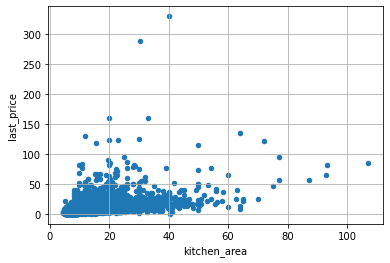

In [138]:
data.plot(x = 'kitchen_area', y='last_price', kind='scatter', grid=True);

По графикам видно,что нет прямой зависимости от стоимости и пощади кухни

***Количество комнат и цена***

<AxesSubplot:xlabel='rooms'>

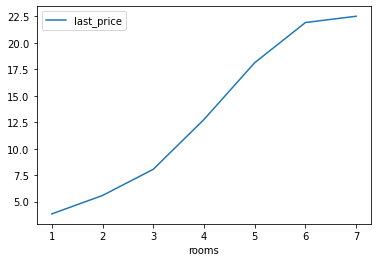

In [110]:
data.pivot_table(index = 'rooms', values='last_price').plot();

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

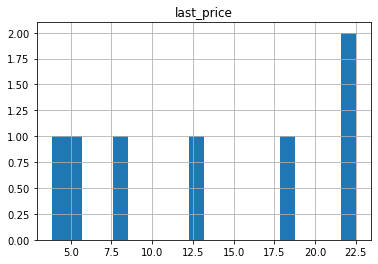

In [111]:
data.pivot_table(index = 'rooms', values='last_price').hist(bins=20);

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

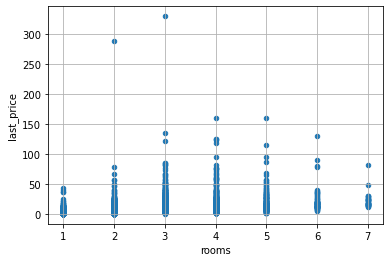

In [112]:
data.plot(x = 'rooms', y='last_price', kind='scatter', grid=True);

Нет явной зависимости от числа комнат и цены

In [113]:
data[['total_area', 'last_price', 'living_area', 'kitchen_area', 'rooms']].corr()

,total_area,last_price,living_area,kitchen_area,rooms
total_area,1.000000,0.666256,0.930436,0.581894,0.788194
last_price,0.666256,1.000000,0.567044,0.524362,0.388155
living_area,0.930436,0.567044,1.000000,0.356259,0.870574
kitchen_area,0.581894,0.524362,0.356259,1.000000,0.219994
rooms,0.788194,0.388155,0.870574,0.219994,1.000000


<AxesSubplot:xlabel='type_of_floor'>

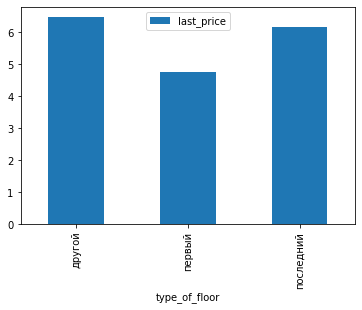

In [115]:
data.pivot_table(index = 'type_of_floor', values='last_price').plot.bar();

Получается, что чем выше этаж, тем больше стоимость.

***День недели и цена***

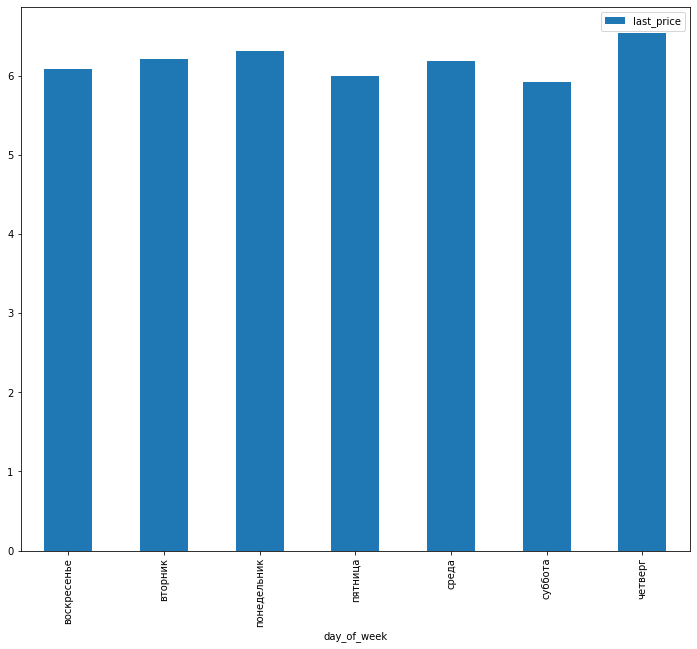

In [144]:
data.pivot_table(index = 'day_of_week', values='last_price').plot(kind='bar',figsize=(12,10));

Получается, что в пятницу были самые худшие продажи.

***Месяц и цена***

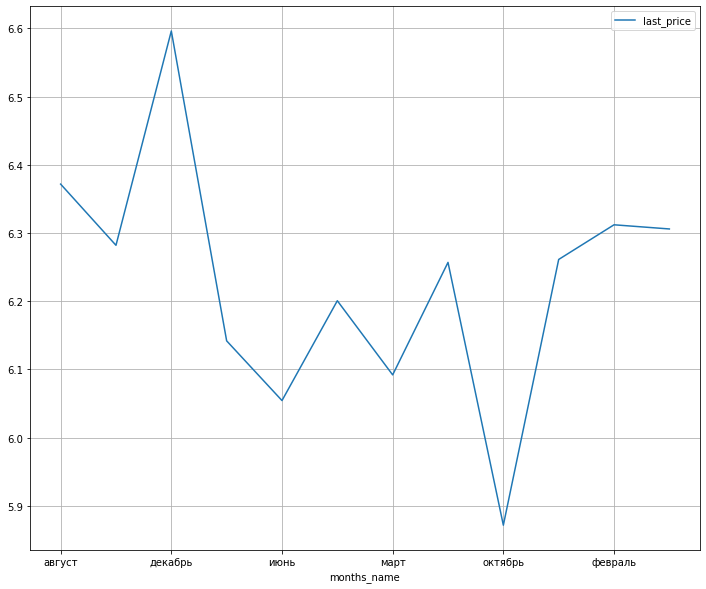

In [145]:
data.pivot_table(index = 'months_name',values='last_price').plot(figsize=(12,10), grid=True);

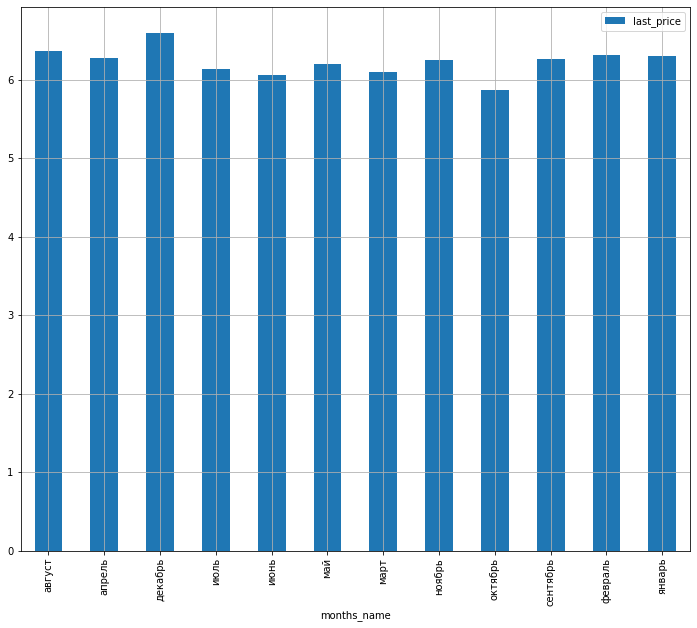

In [146]:
data.pivot_table(index = 'months_name',values='last_price').plot(kind='bar', figsize=(12,10), grid=True);

В октябре продаются хуже всего, а в декабре самые лучшие продажи.

***Год и цена***

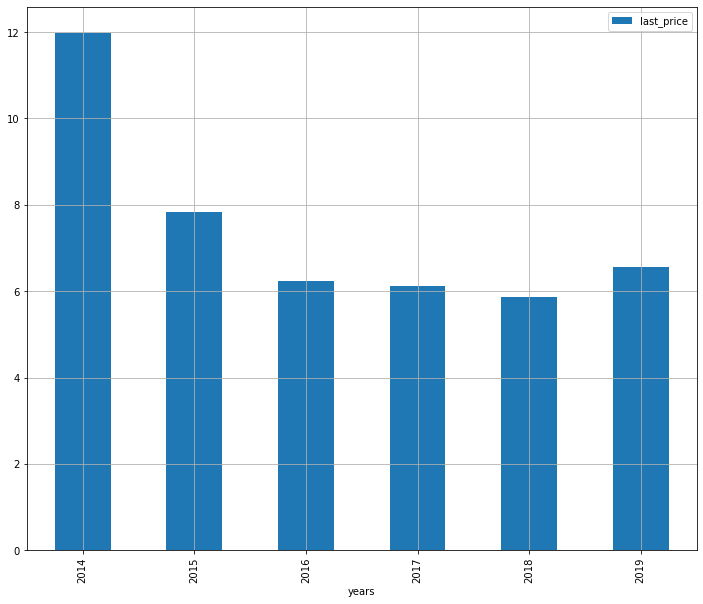

In [147]:
data.pivot_table(index = 'years',values='last_price').plot(kind='bar', figsize=(12,10), grid=True);

Наибольшее количество продаж было в 2014 году, а дальше все начало снижаться. Но потом небольшой подъем в 2019 году, по сравнению с 2018 годом.

***Наиболее чаще всего встречаемых населенных пунктов и средняя цена за кв м в каждом населенном пункте***


In [148]:
data['locality_name'].value_counts().head(10) 

Санкт-Петербург    13880
Мурино               454
Шушары               391
Кудрово              376
Всеволожск           357
Пушкин               334
Колпино              321
Парголово            288
Гатчина              288
Петергоф             190
Name: locality_name, dtype: int64

Нашли топ 10 частовстречаемых объявлений. Санкт-Петербург самый часто встречаемый населенных пунктов.

In [123]:
#создадим отдельный датафрейм в котором найдем эти города
sr = data.query('(locality_name == "Санкт-Петербург") or (locality_name == "Мурино")  or (locality_name == "Шушары") or (locality_name == "Кудрово" ) or (locality_name == "Всеволожск" ) or (locality_name == "Пушкин") or (locality_name == "Колпино") or (locality_name == "Гатчина") or (locality_name == "Парголово") or (locality_name == "Петергоф")') #############)
res = sr.pivot_table(index='locality_name', values='metres_price', aggfunc='mean')
res

,metres_price
locality_name,
Всеволожск,69029.150099
Гатчина,68655.023216
Колпино,75129.845412
Кудрово,95269.611676
Мурино,85669.463692
Парголово,90756.003417
Петергоф,83754.204102
Пушкин,103249.095316
Санкт-Петербург,113233.106508


In [124]:
print(res.min())
res.max()

metres_price    68655.023216
dtype: float64


metres_price    113233.106508
dtype: float64

In [125]:
res.value_counts()

metres_price 
68655.023216     1
69029.150099     1
75129.845412     1
78350.719309     1
83754.204102     1
85669.463692     1
90756.003417     1
95269.611676     1
103249.095316    1
113233.106508    1
dtype: int64

Топ 1 - Санкт-Петербург

Топ10 - Гатчина

Минимальная цена из 10 чатовстречаемых городов в Гатчине, максимальная в Санкт_петербурге

***Санкт-Петербург***

                        last_price
cityCenters_nearest_km            
0.0                      17.736542
1.0                      20.522893
2.0                      16.615552
3.0                      10.183891
4.0                      11.160857


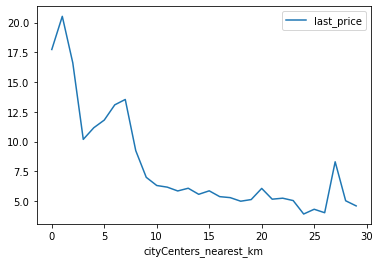

In [151]:
saint = data.query('locality_name == "Санкт-Петербург"')
print(saint.pivot_table(index='cityCenters_nearest_km',values='last_price', aggfunc='mean').head())
saint.pivot_table(index='cityCenters_nearest_km',values='last_price', aggfunc='mean').plot();

Видно, что чем дальше от центра находится квартира, тем она дешевле.

Центр города приблизительно заканчивается на 5 км

Центр города приблизительно заканчивается после 6-7км

# Вывод

Я сделала предработку данных и нашла интересные зависимости на рынке.

В предработке данных:
- В предработке данных я уменьшила изначальную таблицу где-то на 10%. 
- Убрала пропущенные значения (сколько этажей в здании ) и аномальные значения, не соответсвующие гос.стандартам.
  Такие как:
      - площадь кухни меньше 4.50 метра; 
      - жилая площадь меньше 7.00; 
      - общая площадь больше 250 и т.д. 
- Также заполнила картографические пропуски значением -1, что означает пропущенное значение.
- Поменяла тип данных в некоторых столбцах, чтобы в дальнейшем с ними было удобней раотать. 
Так завершилась предработка данных. 

Дальше я добавила несколько столбцов, которые помогли в дальнейшем исследовании проверить некоторые зависимости. 
Интересные зависмости после проведения исследовательского анализа данных:
- Зависимость между общей площадью и ценой объекта достаточно явная. ***Чем больше площадь, тем больше цена объекта.***
- Также достаточно явная зависимость наблюдается между на каком этаже находится квартира и ценой объекта. ***Чем выше находится квартира, тем больше цена.***
- Самый худший день недели для начала продаж является пятница. Потом уже идут выходные дни. 
- Как ни странно  самый худший месяц это октябрь, а год 2018. 
- Самым благоприятным днем недели считается понедельник, в декабре, в 2014 году. 
- Из 10 самых встречаемых объектов является Санкт-Петербург, также в этом городе самая большая цена за квадратный метр.
- Интересная зависимость, что чем дальше от центра города находится квартира, тем  цена меньше. 

В итоге я выявила интересные зависимости на рынке недвижимости.
